In [1]:
#import library

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math


In [2]:
df = pd.read_csv('audit_risk.csv')

# **Prapemrosesan Data**

In [3]:
df.head(10)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
5,3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,...,0.4,0,0.2,0.0,2.0,2.156,0.4,0.5,0.4312,0
6,3.89,7,1.10,0.4,0.440,7.41,0.4,2.964,8.51,5.0,...,0.4,0,0.2,0.0,3.2,31.774,0.4,0.5,6.3548,1
7,3.89,8,8.50,0.6,5.100,12.03,0.6,7.218,20.53,5.5,...,0.4,0,0.2,0.0,4.2,18.034,0.4,0.5,3.6068,1
8,3.89,8,8.40,0.6,5.040,11.05,0.6,6.630,19.45,5.5,...,0.4,0,0.2,0.0,4.2,17.206,0.4,0.5,3.4412,1
9,3.89,8,3.98,0.6,2.388,0.99,0.2,0.198,4.97,5.0,...,0.4,0,0.2,0.0,2.4,4.372,0.4,0.5,0.8744,0


In [4]:
#melihat bentuk data(baris, kolom)
df.shape

(776, 27)

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [ ]:
df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [6]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
Sector_score,1.000000,-0.216824,-0.425198,-0.219025,-0.132670,-0.218967,-0.130589,-0.153316,-0.151840,-0.170404,...,-0.128546,-0.114798,-0.136900,-0.103223,-0.337326,-0.173278,-0.154950,NaN,-0.091954,-0.394131
PARA_A,-0.216824,1.000000,0.496680,0.999267,0.161940,0.358550,0.161834,0.267042,0.133786,0.140648,...,0.118941,0.118279,0.172635,0.103981,0.426659,0.481859,0.149198,NaN,0.219759,0.378758
Score_A,-0.425198,0.496680,1.000000,0.504878,0.249438,0.572655,0.248188,0.297547,0.242692,0.274594,...,0.102677,0.177932,0.265322,0.150925,0.720488,0.320920,0.170872,NaN,0.201847,0.619726
Risk_A,-0.219025,0.999267,0.504878,1.000000,0.165287,0.362971,0.165143,0.270223,0.135613,0.143103,...,0.118641,0.121132,0.176159,0.106561,0.432505,0.483291,0.150778,NaN,0.221581,0.385067
PARA_B,-0.132670,0.161940,0.249438,0.165287,1.000000,0.347568,0.999936,0.994100,0.209855,0.230851,...,0.079393,0.203582,0.316541,0.196048,0.397155,0.654453,0.186709,NaN,0.887794,0.257029
Score_B,-0.218967,0.358550,0.572655,0.362971,0.347568,1.000000,0.348152,0.379336,0.277576,0.313798,...,0.015324,0.200841,0.309505,0.171271,0.901276,0.365662,0.127827,NaN,0.207975,0.635768
Risk_B,-0.130589,0.161834,0.248188,0.165143,0.999936,0.348152,1.000000,0.994023,0.209596,0.230547,...,0.079731,0.202823,0.316375,0.195292,0.396947,0.654505,0.186409,NaN,0.887570,0.255286
TOTAL,-0.153316,0.267042,0.297547,0.270223,0.994100,0.379336,0.994023,1.000000,0.217641,0.238237,...,0.089204,0.210752,0.326396,0.202159,0.433828,0.689772,0.197319,NaN,0.888096,0.292022
numbers,-0.151840,0.133786,0.242692,0.135613,0.209855,0.277576,0.209596,0.217641,1.000000,0.908140,...,0.136956,0.202327,0.209598,0.202385,0.502827,0.271115,0.228657,NaN,0.221461,0.308141
Score_B.1,-0.170404,0.140648,0.274594,0.143103,0.230851,0.313798,0.230547,0.238237,0.908140,1.000000,...,0.157595,0.226177,0.248423,0.223343,0.565976,0.308543,0.256551,NaN,0.259737,0.353803


<ipython-input-7-cfa17ae5c25a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


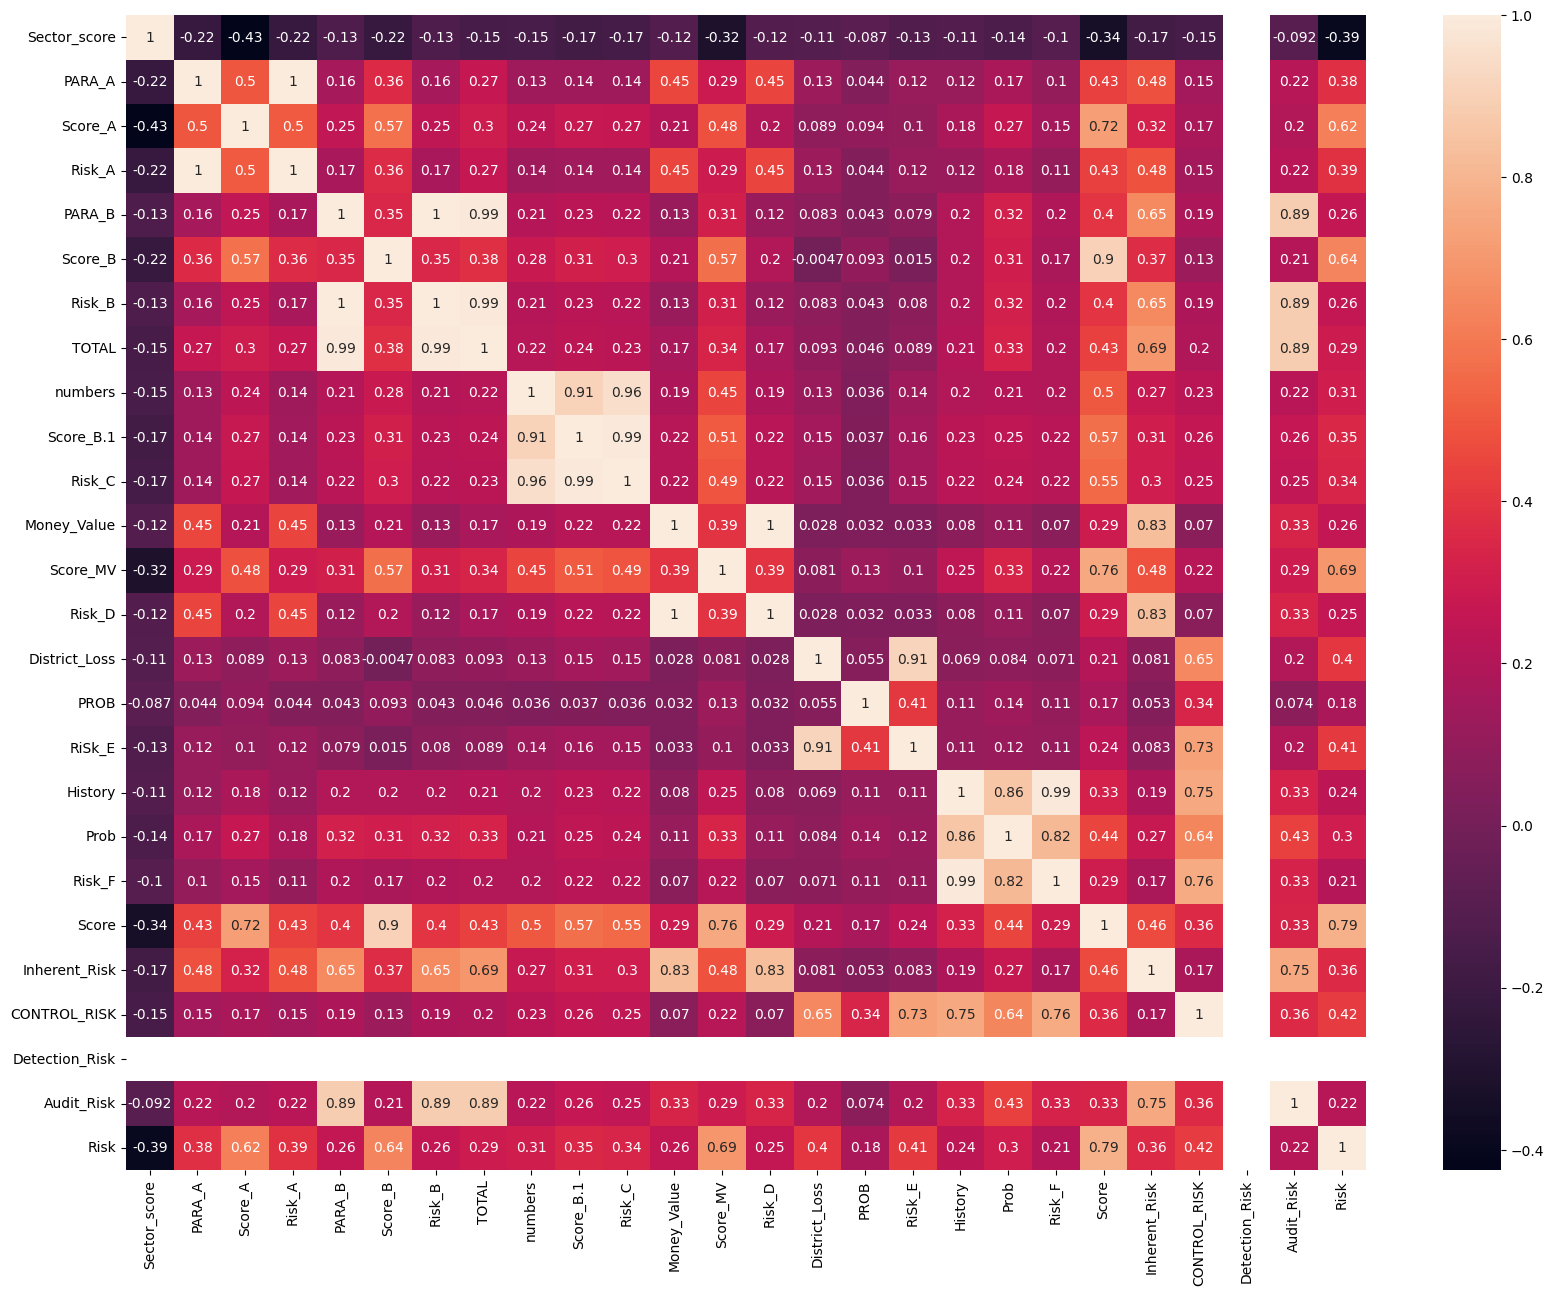

In [7]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,15))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

In [8]:
#Untuk X atribut yang di ambil = Score A, Score B, Score MV, Score
#Untuk label Y yang di ambil = Risk
X = df[['Score', 'Score_MV', 'Score_B', 'Score_A']]
Y = df[['Risk']]

In [9]:
X

,Score,Score_MV,Score_B,Score_A
0,2.4,0.2,0.2,0.6
1,2.0,0.2,0.2,0.2
2,2.0,0.2,0.2,0.2
3,4.4,0.6,0.6,0.2
4,2.0,0.2,0.2,0.2
...,...,...,...,...
771,2.0,0.2,0.2,0.2
772,2.0,0.2,0.2,0.2
773,2.0,0.2,0.2,0.2
774,2.0,0.2,0.2,0.2


In [ ]:
X

,Score,Score_MV,Score_B,Score_A
0,2.4,0.2,0.2,0.6
1,2.0,0.2,0.2,0.2
2,2.0,0.2,0.2,0.2
3,4.4,0.6,0.6,0.2
4,2.0,0.2,0.2,0.2
...,...,...,...,...
771,2.0,0.2,0.2,0.2
772,2.0,0.2,0.2,0.2
773,2.0,0.2,0.2,0.2
774,2.0,0.2,0.2,0.2


In [ ]:
Y

,Risk
0,1
1,0
2,0
3,1
4,0
...,...
771,0
772,0
773,0
774,0


In [10]:
#Cek missing value
X.isna().sum()

Score       0
Score_MV    0
Score_B     0
Score_A     0
dtype: int64

<Axes: >

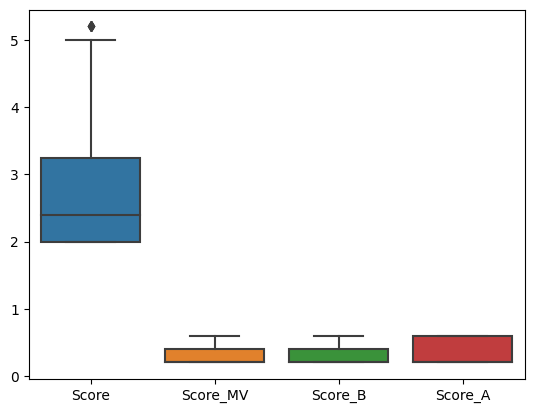

In [11]:
#boxplot
sns.boxplot(data=X)

In [ ]:
sorted(X['Score'], reverse=True)[:20]

[5.2,
 5.2,
 5.2,
 5.2,
 5.0,
 5.0,
 4.8,
 4.8,
 4.8,
 4.8,
 4.8,
 4.8,
 4.8,
 4.8,
 4.8,
 4.8,
 4.8,
 4.8,
 4.8,
 4.6]

In [12]:
X['Score'] = X['Score'].replace(5.2, 4.8)
X['Score'] = X['Score'].replace(5.0, 4.8)

<ipython-input-12-eeed55356911>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Score'] = X['Score'].replace(5.2, 4.8)
<ipython-input-12-eeed55356911>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Score'] = X['Score'].replace(5.0, 4.8)


<Axes: >

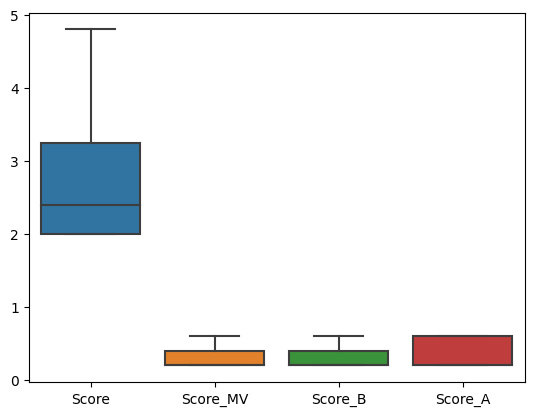

In [13]:
#boxplot
sns.boxplot(data=X)

In [14]:
# melakukan scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [15]:
X

array([[-0.35231961, -0.56989549, -0.6667522 ,  1.42984618],
       [-0.82207908, -0.56989549, -0.6667522 , -0.86976136],
       [-0.82207908, -0.56989549, -0.6667522 , -0.86976136],
       ...,
       [-0.82207908, -0.56989549, -0.6667522 , -0.86976136],
       [-0.82207908, -0.56989549, -0.6667522 , -0.86976136],
       [-0.82207908, -0.56989549, -0.6667522 , -0.86976136]])

In [16]:

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
Y = ohe.fit_transform(Y).toarray()

In [17]:
Y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [18]:
# proses pemisahan/pemecahan data menjadi data training dan data test
# menguji untuk model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(698, 4) (698, 2)
(78, 4) (78, 2)


# **Pemodelan dengan ANN**

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense,InputLayer

In [20]:
#membuat model ANN
model = Sequential() # Model
model.add(InputLayer(input_shape=(4,)))# input layer
model.add(Dense(8, activation='relu'))# hidden layer 1
model.add(Dense(8, activation='relu'))# hidden layer 2
model.add(Dense(8, activation='relu'))# hidden layer 3
model.add(Dense(8, activation='relu'))# hidden layer 4
model.add(Dense(2, activation='softmax'))# output layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 2)                 18        
                                                                 
Total params: 274
Trainable params: 274
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history = model.fit(X_train,y_train,validation_split=0.2,shuffle=True,epochs=50)

Epoch 1/50
18/18 [==============================] - 2s 32ms/step - loss: 0.6073 - accuracy: 0.8369 - val_loss: 0.5806 - val_accuracy: 0.8214
Epoch 2/50
18/18 [==============================] - 0s 8ms/step - loss: 0.5145 - accuracy: 0.8405 - val_loss: 0.5095 - val_accuracy: 0.8143
Epoch 3/50
18/18 [==============================] - 0s 8ms/step - loss: 0.4324 - accuracy: 0.8799 - val_loss: 0.4497 - val_accuracy: 0.8357
Epoch 4/50
18/18 [==============================] - 0s 8ms/step - loss: 0.3601 - accuracy: 0.8961 - val_loss: 0.4000 - val_accuracy: 0.8500
Epoch 5/50
18/18 [==============================] - 0s 9ms/step - loss: 0.3058 - accuracy: 0.9050 - val_loss: 0.3660 - val_accuracy: 0.8643
Epoch 6/50
18/18 [==============================] - 0s 7ms/step - loss: 0.2705 - accuracy: 0.9122 - val_loss: 0.3408 - val_accuracy: 0.8643
Epoch 7/50
18/18 [==============================] - 0s 8ms/step - loss: 0.2482 - accuracy: 0.9140 - val_loss: 0.3251 - val_accuracy: 0.8643
Epoch 8/50
18/18 [=

# **Visualisasi Data**

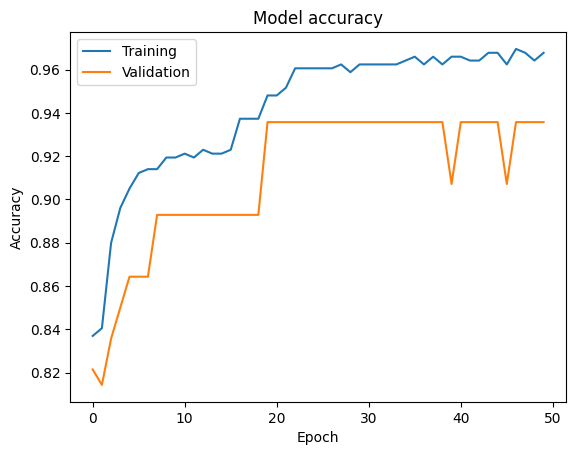

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training','Validation'])
plt.show()

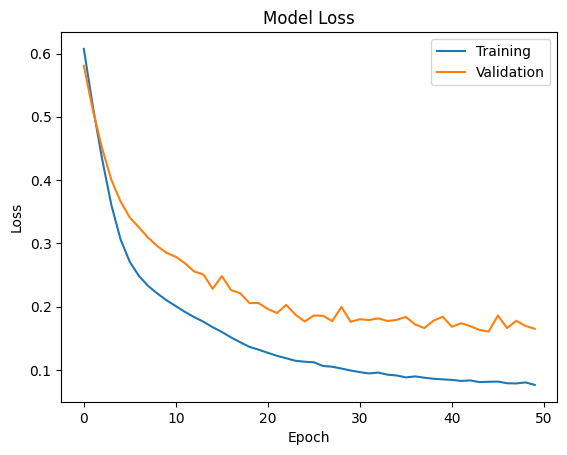

In [24]:
plt.plot(history.history['loss'],label='Training')
plt.plot(history.history['val_loss'],label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# **Evaluation**

In [25]:
score, acc = model.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

70/70 [==============================] - 0s 2ms/step - loss: 0.0931 - accuracy: 0.9613
Train score: 0.09307114779949188
Train accuracy: 0.9613180756568909


In [26]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print('*'*20)
score, acc = model.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

3/3 [==============================] - 0s 3ms/step
********************
8/8 [==============================] - 0s 3ms/step - loss: 0.1051 - accuracy: 0.9487
Test score: 0.1050957515835762
Test accuracy: 0.9487179517745972
